In [1]:
# !pip install geocoder
import tweepy
# !pip3 install twint
import json 
import datetime
import geocoder
from tweepy import OAuthHandler
# !pip install xlsxwriter   
import xlsxwriter
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
secrets = json.loads(open("samsung_key.json","r").read())

api_key = secrets['CONSUMER_KEY']
api_key_secret = secrets['CONSUMER_SECRET']
access_key = secrets['ACCESS_TOKEN_KEY']
access_key_secret = secrets['ACCESS_TOKEN_SECRET']

auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#change per brand
screen_name = "SamsungSupport"

In [3]:
import csv
csvFile = open('samsung_file1.csv', 'w')
counter=0

csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q='#GalaxyS21',count=2000,lang="en", tweet_mode='extended').items(2000):
    print (tweet.full_text)
    csvWriter.writerow([tweet.full_text.encode('utf-8')])
counter+=1
print("Total %d User Timeline Tweets collected" % counter)
csvFile.close()

Have a lot on my mind so I chose #MemorizeMySpot. With the #GalaxySmartTag, I have 1 less thing to worry about. #SmartTagYoureIt, tell @SamsungMobileSA what your 1st reaction is &amp; enter the draw to WIN a #GalaxyS21, Smart Tag and Buds pro! Ts&amp;Cs apply.
Life’s full of epic moments. Never miss a single one of them with the new #GalaxyS215G and its revolutionary features. Available Now. {https://t.co/4yidJ1Vq7X}

#s21 #S21Plus #S21Ultra #s21epicmoments #s21nationalepicday #GalaxyS21 #SimsRevolution #smartphone #CurfewForMen
RT @LiveSmart: Capture epic moments at the palm of your hands. #GalaxyxBTS

Get the #GalaxyS21 Ultra 5G now: https://t.co/8sc6Jl1WDL https:…
RT @LiveSmart: Capture epic moments at the palm of your hands. #GalaxyxBTS

Get the #GalaxyS21 Ultra 5G now: https://t.co/8sc6Jl1WDL https:…
RT @LiveSmart: Capture epic moments at the palm of your hands. #GalaxyxBTS

Get the #GalaxyS21 Ultra 5G now: https://t.co/8sc6Jl1WDL https:…
RT @SamsungMobile: Can your phone capture 

In [4]:
import pandas as pd
sdf = pd.read_csv('samsung_file1.csv')  
sdf.to_csv('sentiment_of_samsung.csv', header = ['Tweets'])

In [5]:
sdf1 = pd.read_csv('sentiment_of_samsung.csv') 
sdf1.shape

(1999, 2)

In [6]:
import re
import string

def clean_text(text):
  text = re.sub('@[\w]*','',text)
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*','',text)
  text= re.sub(r'@[A-Za-z0-9]+','',text) #remove mention
  text = re.sub('https?://[A-Za-z0-9./]+','',text) #remove https
  text = re.sub('b\w*','',text)
  return text

cleaned = lambda x: clean_text(x)

In [7]:
sdf1['Tweets']= pd.DataFrame(sdf1.Tweets.apply(cleaned))
sdf1

,Unnamed: 0,Tweets
0,0,full of epic moments Never miss a single one ...
1,1,Capture epic moments at the palm of your han...
2,2,Capture epic moments at the palm of your han...
3,3,Capture epic moments at the palm of your han...
4,4,Can your phone capture all the amazing photo...
...,...,...
1994,1994,feeling when late amp you find your keys w...
1995,1995,Capture epic moments at the palm of your han...
1996,1996,Capture epic moments at the palm of your han...
1997,1997,Entered hoping for the Sponsored


In [8]:
sdf2=sdf1.drop(["Unnamed: 0"], axis=1)
sdf2

,Tweets
0,full of epic moments Never miss a single one ...
1,Capture epic moments at the palm of your han...
2,Capture epic moments at the palm of your han...
3,Capture epic moments at the palm of your han...
4,Can your phone capture all the amazing photo...
...,...
1994,feeling when late amp you find your keys w...
1995,Capture epic moments at the palm of your han...
1996,Capture epic moments at the palm of your han...
1997,Entered hoping for the Sponsored


In [9]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peri_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\peri_\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\peri_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\peri_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

sdf2['TBpolarity'] = sdf2['Tweets'].apply(get_polarity)

In [11]:
sdf2['Sentiment_type']= ''
sdf2.loc[sdf2.TBpolarity>0, 'Sentiment_type']='POSITIVE'
sdf2.loc[sdf2.TBpolarity==0, 'Sentiment_type']='NEUTRAL '
sdf2.loc[sdf2.TBpolarity<0, 'Sentiment_type']='NEGATIVE'
sdf2.head()

,Tweets,TBpolarity,Sentiment_type
0,full of epic moments Never miss a single one ...,0.128734,POSITIVE
1,Capture epic moments at the palm of your han...,0.100000,POSITIVE
2,Capture epic moments at the palm of your han...,0.100000,POSITIVE
3,Capture epic moments at the palm of your han...,0.100000,POSITIVE
4,Can your phone capture all the amazing photo...,0.264286,POSITIVE


In [12]:
sdf3=sdf2.drop_duplicates()

In [13]:
sdf3.shape

(207, 3)

In [14]:
sdf4=sdf3.head(200)

In [15]:
sdf4['Sentiment_type'].value_counts()

POSITIVE    132
NEUTRAL      59
NEGATIVE      9
Name: Sentiment_type, dtype: int64

In [16]:
sdf4.to_csv('samsung.csv')

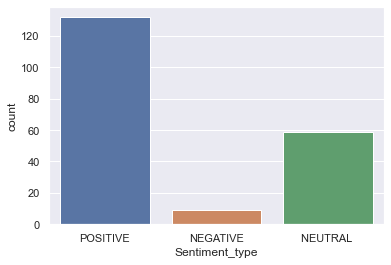

In [17]:
sns.countplot(x ='Sentiment_type',data = sdf4)
plt.show()